**AI@tn'2020 Trainings**

Python Tools for Neural Deep Systems


# Simple Neural Netwok with Keras

In [ ]:
##############
import keras
##############

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

from keras.optimizers import SGD

###################
# Data preparation 
###################

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

img_rows, img_cols = 28, 28
num_classes = 10

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

###############
# Model Design 
###############

model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

################
# Model Display 
################

model.summary()

##############
# Model Train 
##############

batch_size = 32
epochs = 2

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6552 - accuracy: 0.7964 - val_loss: 0.1809 - val_accuracy: 0.9478
Epoch 2/2
1875/1875 [===

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# CNN with Keras

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               495744    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

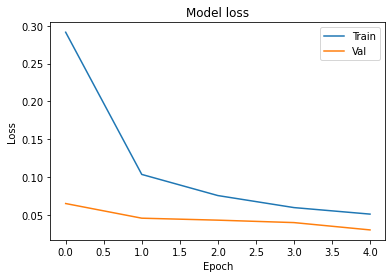

In [ ]:
##########################################
# model1 is another Neural Network object
#       !! using the same dyata !!
##########################################
model1 = Sequential()

#################################
# Here we add convolution layers 
#################################

model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (3, 3), activation='relu'))

####################################################################
# Flatten layer to serialize data 
# transforms a two-dimensional matrix of features into a vector 
# that can be fed into a fully connected neural network classifier
####################################################################

model1.add(Flatten())

################################################
# add fully connected neural network classifier
################################################

model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

###################
# Perform training 
###################

batch_size = 32
epochs = 5

hist = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

##########################
# Dipslay results summary 
##########################

model1.summary()

import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Handle CNN Models

Drive mount 

In [ ]:
##################
#Montage du drive
##################

import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#####################
# Save trained models
#####################

model1.save('/content/gdrive/My Drive/!!Events!!/MNIST_model.h5')

In [ ]:
#####################
# Load trained models
#####################

from keras.models import load_model 
Loaded_model = load_model('/content/gdrive/My Drive/!!Events!!/MNIST_model.h5')

In [ ]:
#####################
# Using Loaded Model
#####################

Loaded_model.summary()

print(Loaded_model.predict(x_test[30].reshape(1, 28, 28, 1)))

print(Loaded_model.predict(x_test[30].reshape(1, 28, 28, 1)).argmax())

plt.imshow(x_test[30].reshape(28, 28),cmap='Greys')

In [ ]:
##########################
# finetuning laoded Model 
##########################

batch_size = 32
epochs = 5

hist = Loaded_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Analysing Learned Features 

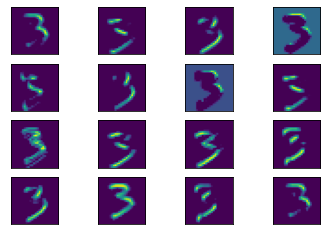

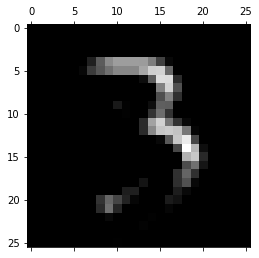

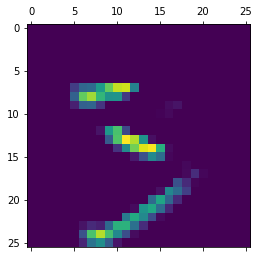

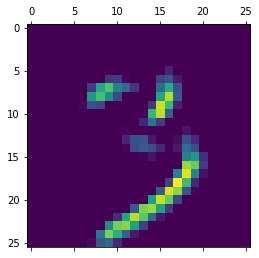

In [ ]:
from keras import models
from matplotlib import pyplot
layer_outputs = [layer.output for layer in Loaded_model.layers[:3]]
activation_model = models.Model(inputs=Loaded_model.input, outputs=layer_outputs)
activations = activation_model.predict(x_test[30].reshape(1,28,28,1))
first_layer_activation = activations[0]

square = 4
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(first_layer_activation[0, :, :, ix-1], cmap='viridis')
		ix += 1
# show the figure
pyplot.show()

plt.matshow(first_layer_activation[0, :, :, 0], cmap='gray')
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')


# Pretrained Model ResNet50 (Keras Application)

In [ ]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

# model.summary()

from google.colab import files
up=files.upload()
img_path = 'Elephant.jpg'

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5)[0])

102973440/102967424 [==============================] - 1s 0us/step


Saving Elephant.jpg to Elephant.jpg
40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.87925094), ('n01871265', 'tusker', 0.10295206), ('n02504013', 'Indian_elephant', 0.007906027), ('n02437312', 'Arabian_camel', 0.003647497), ('n02412080', 'ram', 0.0018154735)]


# customize Application VGG19

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras import models
from keras.models import Model
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import preprocess_input 
import os
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.applications import VGG19
vgg_conv = VGG19()
vgg_conv.summary()

In [ ]:
for layer in vgg_conv.layers[-3:]:
    layer.trainable = False
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

# MobileNet for CIFAR10

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2
from keras.layers import Input,Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.utils.vis_utils import plot_model
from keras.datasets import cifar10
import keras 

batch_size = 32
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = keras.models.Sequential()
#model.add(Conv2D(64, kernel_size=3, input_shape=(224,224,3))) 
#model.add(MobileNetV2().layers[2])
model.add(MobileNetV2(include_top=False, input_shape=x_train.shape[1:])) #, pooling='max'))
model.add(Flatten())
model.add(Dense(10))
model.summary()
plot_model(model)

# initiate SGD optimizer
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using SGD
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

9412608/9406464 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1, 1, 1280)        2257984   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                12810     
Total params: 2,270,794
Trainable params: 2,236,682
Non-trainable params: 34,112
_________________________________________________________________
Epoch 1/2
1563/1563 [==============================] - 379s 240ms/step - loss: 7.1341 - accuracy: 0.1107 - val_loss: 11.2827 - val_accuracy: 0.1000
Epoch 2/2
313/313 [==============================] - 9s 30ms/step - loss: 7.3365 - accuracy: 0.1011
Test loss: 7.336480617523193
Test accuracy: 0.101099997758

In [ ]:
from keras.datasets import cifar10
from keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input,Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from keras.applications.mobilenet_v2 import MobileNetV2
import keras 

batch_size = 32
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

MobiNet = MobileNetV2(weights='imagenet',include_top=False, input_shape=x_train.shape[1:])
#MobNet = MobileNetV2()
for layer in MobiNet.layers[:-6]: 
  layer.trainable = False 

for layer in MobiNet.layers: 
  sp = '  '[len(layer.name)-9:]
  print(layer.name, sp, layer.trainable)

MobNet = keras.models.Sequential()
MobNet.add(MobiNet)
MobNet.add(Flatten())
MobNet.add(Dense(num_classes, activation='softmax'))
MobNet.summary()
plot_model(MobNet)

# initiate SGD optimizer
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# Let's train the model using SGD
MobNet.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

MobNet.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

scores = MobNet.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

input_4    False
Conv1    False
bn_Conv1   False
Conv1_relu   False
expanded_conv_depthwise  False
expanded_conv_depthwise_BN  False
expanded_conv_depthwise_relu  False
expanded_conv_project  False
expanded_conv_project_BN  False
block_1_expand  False
block_1_expand_BN  False
block_1_expand_relu  False
block_1_pad  False
block_1_depthwise  False
block_1_depthwise_BN  False
block_1_depthwise_relu  False
block_1_project  False
block_1_project_BN  False
block_2_expand  False
block_2_expand_BN  False
block_2_expand_relu  False
block_2_depthwise  False
block_2_depthwise_BN  False
block_2_depthwise_relu  False
block_2_project  False
block_2_project_BN  False
block_2_add  False
block_3_expand  False
block_3_expand_BN  False
block_3_expand_relu  False
block_3_pad  False
block_3_depthwise  False
block_3_depthwise_BN  False
block_3_depthwise_relu  False
block_3_project  False
block_3_project_BN  False
block_4_expand  False
block_4_expand_BN  False
block_4_expand_relu  False
block_4_depthwise  Fa